___
# Ciência dos Dados - PROJETO 1

## Rafael Alves de Mello Almada
___

## Machismo e tecnologia

___
## O machismo presente nas diversas regiões do Brasil atrasam o desenvolvimento tecnológico do país?

Com esta pesquisa, pretendo analisar o machismo presente nas diversas regiões do Brasil e ver se ele é um impacto ao desenvolvimento tecnológico do país e ao acesso à tecnologia do brasileiro. 

___
## Filtros da base de dados

In [130]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [131]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\rafaa\Documents\GitHub\Dados_DP_2018


In [132]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
df=pd.read_csv('PES2015csv (2).zip', compression='zip', header=0, sep=',', quotechar='"')
#df2011=pd.read_excel('PES2011csv.zip', compression='zip',header=0,sep=',',quotechar='"')

In [133]:
df.loc[(df.UF>10)&(df.UF<19),'Região']='Norte'
df.loc[(df.UF>20)&(df.UF<29),'Região']='Nordeste'
df.loc[(df.UF>30)&(df.UF<39),'Região']='Sudeste'
df.loc[(df.UF>40)&(df.UF<49),'Região']='Sul'
df.loc[(df.UF>50)&(df.UF<59),'Região']='Centro-Oeste'

In [134]:
df.V0302=df.V0302.astype('category') #sexo
df.V8005=df.V8005.astype('float') #Idade do morador no ano de referência
df.V6002=df.V0302.astype('category') #rede de ensino
df.V0601=df.V0601.astype('category') #sabe ler e escrever
df.V0602=df.V0602.astype('category') #frequenta escola
df.V6003=df.V6003.astype('category') #Curso que frequenta
df.V0606=df.V0606.astype('category') #frequentou antes escola
df['Região']=df['Região'].astype('category') #Unidade da Federação
df.V4011=df.V4011.astype('category') #Estado Civil
df.V9029=df.V9029.astype('category') #Posição na ocupação no trabalho principal
#df['Frequenta escola ou creche']=df['Frequenta escola ou creche'].astype('category')
df.V9532=df.V9532.astype('float') #rendimento mensal (salario)


In [135]:
df.V0302.cat.categories=(['Masculino','Feminino'])
df.V0601.cat.categories=(['Sim','Não'])
df.V0602.cat.categories=(['Sim','Não'])
df.V6002.cat.categories=(['Pública','Privada'])
df.V6003.cat.categories=(['Regular do ensino fundamental','Regular do ensino médio','Educação de jovens e adultos ou supletivo do ensino fundamental','Educação de jovens e adultos ou supletivo do ensino médio','Superior de graduação','Alfabetização de jovens e adultos','Creche','Classe de alfabetização - CA','Maternal, jardim de infância etc.','Pré-vestibular','Mestrado ou doutorado'])
df.V0606.cat.categories=['Sim','Não']
df['Região'].cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste'])
df.V4011.cat.categories=(['Casado(a)','Desquitado(a) ou separado(a) judicialmente','Divorciado(a)','Viúvo(a)','Solteiro(a)'])
df.V9029.cat.categories=(['Empregado','Trabalhador doméstico','Conta própria','Empregador','Trabalhador não remunerado membro da unidade domiciliar','Outro trabalhador não remunerado','Trabalhador na construção para o próprio uso'])

In [136]:
df.loc[(df.V0602=='Sim'),'Já estudou/estuda']='Sim'
df.loc[(df.V0602=='Não')&(df.V0606=='Sim'),'Já estudou/estuda']='Sim'
df.loc[(df.V0602=='Não')&(df.V0606=='Não'),'Já estudou/estuda']='Não'

In [137]:
print('Porcentagem da população feminina em relação ao total: {0}%'.format(100*df.V0302.value_counts()[1]/df.V0302.count()))
#print('')

Porcentagem da população feminina em relação ao total: 51.46509985878556%


In [146]:
df2015=pd.DataFrame()
df2015['Região']=df['Região']
df2015['Sexo']=df.V0302
df2015['Idade do morador na data de referência']=df.V8005
df2015['Sabe ler e escrever']=df.V0601
#df2015['Frequenta escola ou creche']=df.V0602
#df2015['Já frequentou escola ou creche']=df.V0606
df2015['Rede de ensino']=df.V6002
df2015['Curso que frequenta']=df.V6003
df2015['Estado Civil']=df.V4011
df2015['Posição na ocupação no trabalho principal']=df.V9029
df2015['Já estudou ou estuda']=df['Já estudou/estuda']
df2015['Salário']=df.V9532
df2015.dropna()

df2015

,Região,Sexo,Idade do morador na data de referência,Sabe ler e escrever,Rede de ensino,Curso que frequenta,Estado Civil,Posição na ocupação no trabalho principal,Já estudou ou estuda,Salário
0,Sudeste,Masculino,23.0,Sim,Pública,NaN,Casado(a),Empregado,Sim,800.0
1,Sudeste,Feminino,23.0,Sim,Privada,NaN,Viúvo(a),Empregado,Sim,1150.0
2,Sudeste,Feminino,35.0,Sim,Privada,Superior de graduação,NaN,Empregado,Sim,880.0
3,Sudeste,Masculino,34.0,Sim,Pública,NaN,NaN,Empregador,Sim,3000.0
4,Sudeste,Feminino,11.0,Sim,Privada,Regular do ensino fundamental,Casado(a),NaN,Sim,NaN
5,Sudeste,Feminino,7.0,Sim,Privada,Regular do ensino fundamental,NaN,NaN,Sim,NaN
6,Sudeste,Feminino,4.0,Não,Privada,Creche,NaN,NaN,Sim,NaN
7,Sudeste,Feminino,18.0,Sim,Privada,NaN,Casado(a),Empregado,Sim,880.0
8,Sudeste,Masculino,46.0,Sim,Pública,NaN,Casado(a),Conta própria,Sim,3500.0
9,Sudeste,Feminino,81.0,Sim,Privada,NaN,Solteiro(a),NaN,Sim,NaN


In [147]:
ct1=pd.crosstab(df2015.Sexo,df2015['Posição na ocupação no trabalho principal'])
ct1

Posição na ocupação no trabalho principal,Empregado,Trabalhador doméstico,Conta própria,Empregador,Trabalhador não remunerado membro da unidade domiciliar,Outro trabalhador não remunerado,Trabalhador na construção para o próprio uso
Sexo,,,,,,,
Masculino,53553,928,19874,3832,456,142,162
Feminino,39605,10137,11383,1630,921,249,29


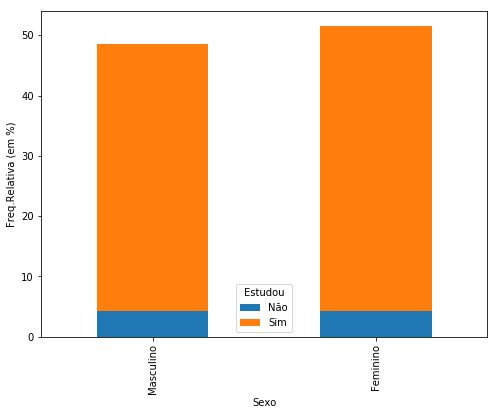

In [150]:
ct1= (pd.crosstab(df2015.Sexo, df2015['Já estudou ou estuda'], margins=True, rownames=['Sexo'], colnames=['Estudou'], normalize=True)*100).round(decimals=1)

ct5 = ct1.iloc[0:2,0:2]
plot = ct5.plot(kind='bar',stacked=True,figsize=(8,6))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

In [151]:
ut1=(df2015['Salário'].value_counts(sort=False, normalize=True)*100).round(decimals=1)
#print(ut1,'\n')
df2015['Salário'].describe()

count    1.543850e+05
mean     1.353759e+10
std      1.155613e+11
min      5.000000e+00
25%      7.880000e+02
50%      1.125000e+03
75%      2.000000e+03
max      1.000000e+12
Name: Salário, dtype: float64

___
## Análise e Resultados

597.4144290189182


___
## Conclusão 

Descreva aqui suas conclusões!